In [2]:
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn 
import torchvision 
from torchvision import transforms as T
from torch.utils.data import Dataset,DataLoader
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torchinfo
# import torch_xla.core.xla_model as xm

In [3]:
df_path = '/kaggle/input/lines-dataset/historical_df.csv'
lines_path = '/kaggle/input/lines-dataset/Lines/resources/results'
bin_path = '/kaggle/input/lines-dataset/bin_imgs/bin_imgs'
df = pd.DataFrame(pd.read_csv(df_path))
list_imgs = os.listdir(lines_path)

# Change an element in the 'Age' feature
df.at[0, 'text'] = 'بسم الله الرحمن الرحيم'
df['img']
# df = df.iloc[0:1000]

# train_df, test_df = train_test_split(df, test_size=4100, random_state=42)

0        asmaa_nawawi-002_R_2.png
1        asmaa_nawawi-002_R_3.png
2        asmaa_nawawi-002_R_4.png
3        asmaa_nawawi-002_R_5.png
4        asmaa_nawawi-002_R_6.png
                  ...            
4148    asmaa_nawawi-139_L_16.png
4149    asmaa_nawawi-139_L_17.png
4150    asmaa_nawawi-139_L_18.png
4151    asmaa_nawawi-139_L_19.png
4152    asmaa_nawawi-139_L_21.png
Name: img, Length: 4153, dtype: object

# Data Handling and Exploration


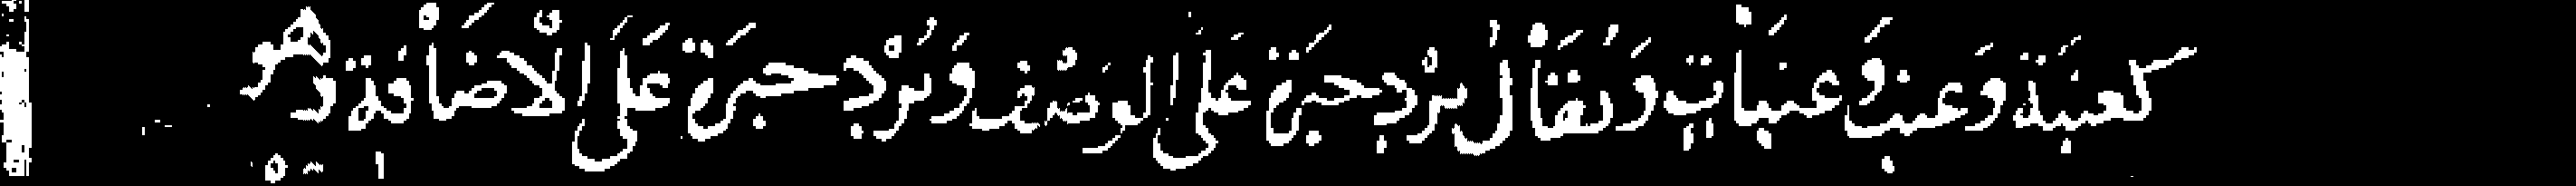

In [35]:
class Mydataset(Dataset):
    
    def __init__(self,df,bin_path,trans=None):
        self.df = df
        self.bin_path = bin_path
        self.trans = trans
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self,idx):
        img_path = df.iloc[idx]['img']
        img = Image.open(os.path.join(self.bin_path,img_path))
        
        if self.trans:
            img = self.trans(img)
            
        text = df.iloc[idx]['text']
        
        return img,text
dataset = Mydataset(df,bin_path)
dataset[6][0]

In [10]:
import string 

def text_preprocessing(text):
    #remove extra spaces
    text = ' '.join(text.split())
    #punctioation 
    ar_punct = "،آپـ؛؟«»'ًٌَُ"  +   'کِ'
    punct = string.punctuation+ar_punct
    # tokinization 
    text = [letter for letter in text if letter not in punct]
#     print(''.join(text)
    return text

In [11]:
# train_df

In [12]:
df['tokens'] = df['text'].apply(lambda sentence: text_preprocessing(sentence))
df['tokens'] 

0       [ب, س, م,  , ا, ل, ل, ه,  , ا, ل, ر, ح, م, ن, ...
1                             [ح, ر, ف,  , ا, ل, ح, ا, ء]
2       [ف, ص, ل,  , ح, ب, ر,  , ا, ل, ح, ب, ر,  , ا, ...
3       [و, ك, س, ر, ه, ا,  , ل, غ, ت, ا, ن,  , م, ش, ...
4       [ذ, ك, ر,  , ا, ل, ل, غ, ت, ي, ن,  , ف, ي, ه, ...
                              ...                        
4148    [أ, ي,  , م, ا,  , ض, م, ت,  , ر, ح, م, ه, ا, ...
4149    [أ, ي,  , ج, م, ع,  , ا, ل, ح, ر, و, ف,  , ب, ...
4150    [ق, ا, ل,  , أ, ب, و,  , ا, س, ح, ق,  , ي, ع, ...
4151    [ا, ل, م, ا, ء,  , ف, ي,  , ا, ل, ح, و, ض,  , ...
4152    [و, إ, ن, م, ا,  , ا, ل, ق, ر, ء,  , ا, ج, ت, ...
Name: tokens, Length: 4153, dtype: object

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

all_chars = []
df['tokens'].apply(lambda x:all_chars.append(x) )

# flatten list -> from list of list to list
all_chars = [x  for ele in all_chars for x in ele  ]
le.fit(all_chars)

df['target'] = df['tokens'].apply(lambda x: le.transform(x))
print(le.classes_)
num_output = len(le.classes_)



# unique_chars = set(df['tokens'][0])  
# for element in df['tokens'][1:]:
#     unique_chars = set(unique_chars.union(set(element)))

# print(len(unique_chars))

# for s in unique_chars:
#     print(s)

[' ' 'ء' 'أ' 'ؤ' 'إ' 'ئ' 'ا' 'ب' 'ة' 'ت' 'ث' 'ج' 'ح' 'خ' 'د' 'ذ' 'ر' 'ز'
 'س' 'ش' 'ص' 'ض' 'ط' 'ظ' 'ع' 'غ' 'ف' 'ق' 'ك' 'ل' 'م' 'ن' 'ه' 'و' 'ى' 'ي'
 'ی']


In [ ]:
df.head()

In [ ]:
# df.drop(columns='Unnamed: 0', inplace=True)
df.head()

<Axes: >

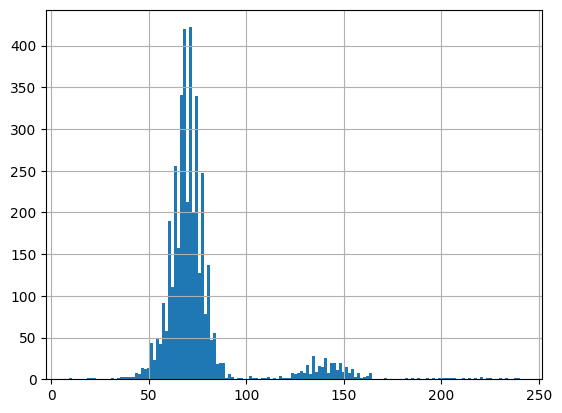

In [24]:
df['len_text'] = df['text'].apply(lambda x : len(x))
df['len_text'].hist(bins=150)

In [25]:
df = df[df['len_text']<150]

In [ ]:
# imgs_list = []
# for i in range(len(dataset)):
#     imgs_list.append(np.array(dataset[i][0]).shape)

# heights  = [ele[0] for ele in imgs_list]  
# widths  = [ele[1] for ele in imgs_list]  
# max(heights)

In [ ]:
# from scipy import stats
# heights  = [ele[0] for ele in imgs_list]  
# widths  = [ele[1] for ele in imgs_list]  

# plt.hist(heights,bins=150)
# print(min(heights),max(heights))
# stats.mode(np.array(heights))


In [ ]:
# plt.hist(widths)
# print(min(widths),max(widths))

# Data Handling

In [36]:
class Mydataset(Dataset):
    
    def __init__(self,df,lines_path,trans=None):
        self.df = df
        self.lines_path = lines_path
        self.trans = trans
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self,idx):
        img_path = self.df.iloc[idx]['img']
        img = Image.open(os.path.join(self.lines_path,img_path))
        
        if self.trans:
            img = self.trans(img)
            
        target = self.df.iloc[idx]['target'] + 2
        
        return img,target

In [106]:
# try to convert them into grayscale
# can i resize using steam carving?

# mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225]". : Imagenet
#  T.Normalize(mean=[0.4325, 0.4884, 0.3712],std=[0.2471, 0.2785, 0.2168]), my dataset

# train_transform = T.Compose([
#     T.Resize((224,224)),
#     T.Grayscale(),
# #     T.RandomAffine((-15,15)),
#     T.ToTensor(),
# #     T.RandomErasing(p=0.3),    
# #     T.Normalize(mean=[0.4325, 0.4884, 0.3712],std=[0.2471, 0.2785, 0.2168]),    
#     T.Normalize(mean=[0.4584],std=[0.2723]),

    
# ])
# val_trasform =  T.Compose([
#     T.Resize((224,224)),
#     T.Grayscale(),
#     T.ToTensor(),
#     T.Normalize(mean=[0.4325, 0.4884, 0.3712],std=[0.2471, 0.2785, 0.2168]),
#     T.Normalize(mean=[0.4584],std=[0.2723]),
    
    
# ])


train_transform = T.Compose([
   T.Resize((128,1024)),
    T.ToTensor(),    
#     T.Grayscale(),
    T.RandomAffine((-5,5)),
    T.RandomErasing(p=0.1),    
    T.ColorJitter(brightness=0.2, contrast=0.2),
    T.RandomRotation(2),
    T.RandomHorizontalFlip(p=0.3) ,
    T.RandomVerticalFlip(p=0.3),
#     T.GaussianBlur(kernel_size = (7,13), sigma = (3 , 4)),    
    
    T.Normalize(mean=[0.4325, 0.4884, 0.3712],std=[0.2471, 0.2785, 0.2168]),
    
#     T.Normalize(mean=[0.0066, 0.0086, 0.0101],std=[0.9308, 0.9306, 0.9249]),
    
    
])
val_trasform =  T.Compose([
    T.Resize((128,1024)),
#     T.Grayscale(),
    
    T.ToTensor(),
    T.Normalize(mean=[0.4325, 0.4884, 0.3712],std=[0.2471, 0.2785, 0.2168]),
    
])

test_size = int(len(df)*0.15)
train_df, test_df = train_test_split(df, test_size=test_size, random_state=42)
train_df,val_df = train_test_split(train_df, test_size=test_size, random_state=42)


train_dataset = Mydataset(train_df,lines_path,train_transform)
val_dataset = Mydataset(val_df,lines_path,val_trasform)
test_dataset = Mydataset(test_df,lines_path,val_trasform)

train_dataset[0][0]

tensor([[[-1.7503, -1.7503, -1.7503,  ..., -1.7503, -1.7503, -1.7503],
         [-1.7503, -1.7503, -1.7503,  ..., -1.7503, -1.7503, -1.7503],
         [-1.7503, -1.7503, -1.7503,  ..., -1.7503, -1.7503, -1.7503],
         ...,
         [-1.7503, -1.7503, -1.7503,  ..., -1.7503, -1.7503, -1.7503],
         [-1.7503, -1.7503, -1.7503,  ..., -1.7503, -1.7503, -1.7503],
         [-1.7503, -1.7503, -1.7503,  ..., -1.7503, -1.7503, -1.7503]],

        [[-1.7537, -1.7537, -1.7537,  ..., -1.7537, -1.7537, -1.7537],
         [-1.7537, -1.7537, -1.7537,  ..., -1.7537, -1.7537, -1.7537],
         [-1.7537, -1.7537, -1.7537,  ..., -1.7537, -1.7537, -1.7537],
         ...,
         [-1.7537, -1.7537, -1.7537,  ..., -1.7537, -1.7537, -1.7537],
         [-1.7537, -1.7537, -1.7537,  ..., -1.7537, -1.7537, -1.7537],
         [-1.7537, -1.7537, -1.7537,  ..., -1.7537, -1.7537, -1.7537]],

        [[-1.7122, -1.7122, -1.7122,  ..., -1.7122, -1.7122, -1.7122],
         [-1.7122, -1.7122, -1.7122,  ..., -1

In [28]:
len(train_dataset)

2833

In [ ]:
min(train_dataset[10][1])

In [108]:
def collate_fn(batch):
    
#     imgs = [b[0] for b in batch]
#     targets = [b[1] for b in batch]
#     targets_length = [len(b[1]) for b in batch]
    
#     # flatten targets
#     targets = [tar for tars in targets for tar in tars]



    imgs = [b[0] for b in batch]
    targets = [torch.tensor(b[1]) for b in batch]
    targets_length = [len(b[1]) for b in batch]

    targets = nn.utils.rnn.pad_sequence(
        sequences=targets,
        batch_first=True,
        padding_value=1,
    )
    
    return torch.stack(imgs), torch.tensor(targets), torch.tensor(targets_length)

In [109]:
bs = 32
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# device = xm.xla_device()
train_loader = DataLoader(train_dataset,batch_size=bs,collate_fn=collate_fn)
val_loader = DataLoader(val_dataset,batch_size=bs,collate_fn=collate_fn)
test_loader = DataLoader(test_dataset,batch_size=bs,collate_fn=collate_fn)

next(iter(train_loader))[2]

/tmp/ipykernel_34/1025719987.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.stack(imgs), torch.tensor(targets), torch.tensor(targets_length)


tensor([ 72,  75,  81,  56,  72,  76,  68,  65,  72,  58,  81,  67,  66,  74,
        196, 156,  65,  69,  69,  63,  66,  75,  82,  67, 102,  79,  77, 146,
         70,  77, 153,  67])

In [ ]:
device

## Claculating the mean and the std of our data

In [ ]:
# dataset = Mydataset(df,lines_path,train_transform)
# imgs_list = []
# for i in range(len(dataset)/4):
#     imgs_list.append(np.array(dataset[i][0]))

# imgs_tensor = torch.tensor(imgs_list)    
# print(imgs_tensor.shape)
# imgs_tensor= imgs_tensor.permute(1,2,3,0)

In [ ]:
# # mean = imgs_tensor.reshape(3,-1).mean(dim=1)
# # std = imgs_tensor.reshape(3,-1).std(dim=1)
# # # q
# # # # imgs = torch.stack([torch.tensor(np.array(image)/255,dtype=torch.float64) for image,target in dataset],dim=0)
# # # # imgs = imgs.permute(3,1,2,0)
# # # # mean = imgs.reshape(3,-1).mean(dim=1)
# # # # std = imgs.reshape(3,-1).std(dim=1)



# # print(mean)
# # print(std)
# # imgs_tensor.reshape(3,-1).shape


# mean = 0.
# std = 0.
# total_samples = 0

# for images, _,_ in train_loader:
#     batch_samples = images.size(0)
#     images = images.view(batch_samples, images.size(1), -1)
#     mean += images.mean(2).sum(0)
#     std += images.std(2).sum(0)
#     total_samples += batch_samples

# mean /= total_samples
# std /= total_samples

# print("Mean:", mean)
# print("Standard Deviation:", std)

## splitting ( I may use cross validaton, we will see later)

# Model

In [112]:
cnn_model = torchvision.models.resnet18()
cnn_model = torch.nn.Sequential(*list(cnn_model.children())[:-2]).to(device)
sample = torch.randn(2,3,128,1024).to(device)
# cnn_model = torchvision.models.densenet169().to(device)
# torchinfo.summary(cnn_model)
# cnn_model(sample).shape
# cnn_model = cnn_model.to(device)
# state_dict = torch.load('/kaggle/input/lines-dataset/model_custom_kag_256channel_epo_74.pth')
# cnn_model.load_state_dict(state_dict)
# torch.save(cnn_model,'resnet')

In [42]:

# torch.save(cnn_model,'resnet')

<All keys matched successfully>

In [8]:
# cnn_model = torch.load('/kaggle/working/resnet')
# state_dict = torch.load('/kaggle/input/lines-dataset/model_custom_kag_256channel_epo_74.pth')
# cnn_model.load_state_dict(state_dict)
# cnn_model

RuntimeError: Error(s) in loading state_dict for Sequential:
	Missing key(s) in state_dict: "0.weight", "1.weight", "1.bias", "1.running_mean", "1.running_var", "4.0.conv1.weight", "4.0.bn1.weight", "4.0.bn1.bias", "4.0.bn1.running_mean", "4.0.bn1.running_var", "4.0.conv2.weight", "4.0.bn2.weight", "4.0.bn2.bias", "4.0.bn2.running_mean", "4.0.bn2.running_var", "4.1.conv1.weight", "4.1.bn1.weight", "4.1.bn1.bias", "4.1.bn1.running_mean", "4.1.bn1.running_var", "4.1.conv2.weight", "4.1.bn2.weight", "4.1.bn2.bias", "4.1.bn2.running_mean", "4.1.bn2.running_var", "5.0.conv1.weight", "5.0.bn1.weight", "5.0.bn1.bias", "5.0.bn1.running_mean", "5.0.bn1.running_var", "5.0.conv2.weight", "5.0.bn2.weight", "5.0.bn2.bias", "5.0.bn2.running_mean", "5.0.bn2.running_var", "5.0.downsample.0.weight", "5.0.downsample.1.weight", "5.0.downsample.1.bias", "5.0.downsample.1.running_mean", "5.0.downsample.1.running_var", "5.1.conv1.weight", "5.1.bn1.weight", "5.1.bn1.bias", "5.1.bn1.running_mean", "5.1.bn1.running_var", "5.1.conv2.weight", "5.1.bn2.weight", "5.1.bn2.bias", "5.1.bn2.running_mean", "5.1.bn2.running_var", "6.0.conv1.weight", "6.0.bn1.weight", "6.0.bn1.bias", "6.0.bn1.running_mean", "6.0.bn1.running_var", "6.0.conv2.weight", "6.0.bn2.weight", "6.0.bn2.bias", "6.0.bn2.running_mean", "6.0.bn2.running_var", "6.0.downsample.0.weight", "6.0.downsample.1.weight", "6.0.downsample.1.bias", "6.0.downsample.1.running_mean", "6.0.downsample.1.running_var", "6.1.conv1.weight", "6.1.bn1.weight", "6.1.bn1.bias", "6.1.bn1.running_mean", "6.1.bn1.running_var", "6.1.conv2.weight", "6.1.bn2.weight", "6.1.bn2.bias", "6.1.bn2.running_mean", "6.1.bn2.running_var", "7.0.conv1.weight", "7.0.bn1.weight", "7.0.bn1.bias", "7.0.bn1.running_mean", "7.0.bn1.running_var", "7.0.conv2.weight", "7.0.bn2.weight", "7.0.bn2.bias", "7.0.bn2.running_mean", "7.0.bn2.running_var", "7.0.downsample.0.weight", "7.0.downsample.1.weight", "7.0.downsample.1.bias", "7.0.downsample.1.running_mean", "7.0.downsample.1.running_var", "7.1.conv1.weight", "7.1.bn1.weight", "7.1.bn1.bias", "7.1.bn1.running_mean", "7.1.bn1.running_var", "7.1.conv2.weight", "7.1.bn2.weight", "7.1.bn2.bias", "7.1.bn2.running_mean", "7.1.bn2.running_var". 
	Unexpected key(s) in state_dict: "cnn.0.weight", "cnn.1.weight", "cnn.1.bias", "cnn.1.running_mean", "cnn.1.running_var", "cnn.1.num_batches_tracked", "cnn.4.0.conv1.weight", "cnn.4.0.bn1.weight", "cnn.4.0.bn1.bias", "cnn.4.0.bn1.running_mean", "cnn.4.0.bn1.running_var", "cnn.4.0.bn1.num_batches_tracked", "cnn.4.0.conv2.weight", "cnn.4.0.bn2.weight", "cnn.4.0.bn2.bias", "cnn.4.0.bn2.running_mean", "cnn.4.0.bn2.running_var", "cnn.4.0.bn2.num_batches_tracked", "cnn.4.1.conv1.weight", "cnn.4.1.bn1.weight", "cnn.4.1.bn1.bias", "cnn.4.1.bn1.running_mean", "cnn.4.1.bn1.running_var", "cnn.4.1.bn1.num_batches_tracked", "cnn.4.1.conv2.weight", "cnn.4.1.bn2.weight", "cnn.4.1.bn2.bias", "cnn.4.1.bn2.running_mean", "cnn.4.1.bn2.running_var", "cnn.4.1.bn2.num_batches_tracked", "cnn.5.0.conv1.weight", "cnn.5.0.bn1.weight", "cnn.5.0.bn1.bias", "cnn.5.0.bn1.running_mean", "cnn.5.0.bn1.running_var", "cnn.5.0.bn1.num_batches_tracked", "cnn.5.0.conv2.weight", "cnn.5.0.bn2.weight", "cnn.5.0.bn2.bias", "cnn.5.0.bn2.running_mean", "cnn.5.0.bn2.running_var", "cnn.5.0.bn2.num_batches_tracked", "cnn.5.0.downsample.0.weight", "cnn.5.0.downsample.1.weight", "cnn.5.0.downsample.1.bias", "cnn.5.0.downsample.1.running_mean", "cnn.5.0.downsample.1.running_var", "cnn.5.0.downsample.1.num_batches_tracked", "cnn.5.1.conv1.weight", "cnn.5.1.bn1.weight", "cnn.5.1.bn1.bias", "cnn.5.1.bn1.running_mean", "cnn.5.1.bn1.running_var", "cnn.5.1.bn1.num_batches_tracked", "cnn.5.1.conv2.weight", "cnn.5.1.bn2.weight", "cnn.5.1.bn2.bias", "cnn.5.1.bn2.running_mean", "cnn.5.1.bn2.running_var", "cnn.5.1.bn2.num_batches_tracked", "cnn.6.0.conv1.weight", "cnn.6.0.bn1.weight", "cnn.6.0.bn1.bias", "cnn.6.0.bn1.running_mean", "cnn.6.0.bn1.running_var", "cnn.6.0.bn1.num_batches_tracked", "cnn.6.0.conv2.weight", "cnn.6.0.bn2.weight", "cnn.6.0.bn2.bias", "cnn.6.0.bn2.running_mean", "cnn.6.0.bn2.running_var", "cnn.6.0.bn2.num_batches_tracked", "cnn.6.0.downsample.0.weight", "cnn.6.0.downsample.1.weight", "cnn.6.0.downsample.1.bias", "cnn.6.0.downsample.1.running_mean", "cnn.6.0.downsample.1.running_var", "cnn.6.0.downsample.1.num_batches_tracked", "cnn.6.1.conv1.weight", "cnn.6.1.bn1.weight", "cnn.6.1.bn1.bias", "cnn.6.1.bn1.running_mean", "cnn.6.1.bn1.running_var", "cnn.6.1.bn1.num_batches_tracked", "cnn.6.1.conv2.weight", "cnn.6.1.bn2.weight", "cnn.6.1.bn2.bias", "cnn.6.1.bn2.running_mean", "cnn.6.1.bn2.running_var", "cnn.6.1.bn2.num_batches_tracked", "cnn.7.0.conv1.weight", "cnn.7.0.bn1.weight", "cnn.7.0.bn1.bias", "cnn.7.0.bn1.running_mean", "cnn.7.0.bn1.running_var", "cnn.7.0.bn1.num_batches_tracked", "cnn.7.0.conv2.weight", "cnn.7.0.bn2.weight", "cnn.7.0.bn2.bias", "cnn.7.0.bn2.running_mean", "cnn.7.0.bn2.running_var", "cnn.7.0.bn2.num_batches_tracked", "cnn.7.0.downsample.0.weight", "cnn.7.0.downsample.1.weight", "cnn.7.0.downsample.1.bias", "cnn.7.0.downsample.1.running_mean", "cnn.7.0.downsample.1.running_var", "cnn.7.0.downsample.1.num_batches_tracked", "cnn.7.1.conv1.weight", "cnn.7.1.bn1.weight", "cnn.7.1.bn1.bias", "cnn.7.1.bn1.running_mean", "cnn.7.1.bn1.running_var", "cnn.7.1.bn1.num_batches_tracked", "cnn.7.1.conv2.weight", "cnn.7.1.bn2.weight", "cnn.7.1.bn2.bias", "cnn.7.1.bn2.running_mean", "cnn.7.1.bn2.running_var", "cnn.7.1.bn2.num_batches_tracked", "rnn.lstm.weight_ih_l0", "rnn.lstm.weight_hh_l0", "rnn.lstm.bias_ih_l0", "rnn.lstm.bias_hh_l0", "rnn.lstm.weight_ih_l0_reverse", "rnn.lstm.weight_hh_l0_reverse", "rnn.lstm.bias_ih_l0_reverse", "rnn.lstm.bias_hh_l0_reverse", "rnn.lstm.weight_ih_l1", "rnn.lstm.weight_hh_l1", "rnn.lstm.bias_ih_l1", "rnn.lstm.bias_hh_l1", "rnn.lstm.weight_ih_l1_reverse", "rnn.lstm.weight_hh_l1_reverse", "rnn.lstm.bias_ih_l1_reverse", "rnn.lstm.bias_hh_l1_reverse", "rnn.lin_hidden.weight", "rnn.lin_hidden.bias", "rnn.mlp.0.weight", "rnn.mlp.0.bias", "rnn.mlp.2.weight", "rnn.mlp.2.bias", "rnn.lin_out.weight", "rnn.lin_out.bias". 

In [ ]:
# for param in cnn_model.layer1.parameters():
#     param.requires_grad = False
# for param in cnn_model.layer2.parameters():
#     param.requires_grad = False

In [ ]:
# # remove average pool and fc layers
# cnn_model = torch.nn.Sequential(*list(cnn_model.children())[:-1]).to(device)
# # torchinfo.summary(cnn_model)

In [ ]:
# maybe adding one more cov 1x1 layer for adjusting # channels could help

In [ ]:
# next(iter(train_loader))[0]

In [31]:
from torch.nn import functional as F
class MyCNN(nn.Module):
    
    def __init__(self):
        super(MyCNN,self).__init__()
        self.conv1 = nn.Conv2d(3,12,3,2,padding=1)
        self.conv2 = nn.Conv2d(12,36,3,2,padding=1)
        self.conv3 = nn.Conv2d(36,84,3,2,padding=1)
        self.conv4 = nn.Conv2d(84,256,3,2,padding=1)
    def forward(self,x):
        x = F.relu(self.conv1(x))
#         print(x.shape)
        x = F.relu(self.conv2(x))
#         print(x.shape)
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        
        return x
cnn_model = MyCNN().to(device)
x = next(iter(train_loader))[0]
feature_map_shape =cnn_model(x.to(device)).shape
feature_map_shape

/tmp/ipykernel_34/1025719987.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.stack(imgs), torch.tensor(targets), torch.tensor(targets_length)


torch.Size([32, 256, 8, 64])

In [139]:
feature_map_shape =cnn_model(sample).shape
print(feature_map_shape)
from torch.nn import functional as F

class RNN_model(nn.Module):
    
    def __init__(self,input_size,hidden_size,num_layers,bi,num_lin,num_output):
        super(RNN_model,self).__init__()
        self.num_lin = num_lin
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers        
        self.bi = bi
        self.D = 2 if self.bi else 1 
        self.lstm = nn.LSTM(input_size,hidden_size,num_layers,bidirectional=bi,batch_first=True)
        self.lin_hidden = nn.Linear(self.D*hidden_size,self.D*hidden_size)
        layers = []
        for _ in range(num_lin):
            layers.append(nn.Linear(self.D*hidden_size,self.D*hidden_size))
            layers.append(nn.ReLU(inplace=True))
        self.mlp = nn.Sequential(*layers)    
        self.lin_out = nn.Linear(self.D*hidden_size,num_output+1) # +1 for the blank ctc 
        self.log_soft = nn.LogSoftmax(dim=2)
        
        
    def forward(self,x): 
#         x : (bs,T,features)
#         print(x)
#         print(x.shape)
        h0 = torch.zeros(self.D*self.num_layers,x.size(0),self.hidden_size).to(device)
        c0 = torch.zeros(self.D*self.num_layers,x.size(0),self.hidden_size).to(device)
        out,_ = self.lstm(x,(h0,c0))
#         print(out)
        out = self.mlp(out)
        out = self.lin_out(out)
        out = F.log_softmax(out,dim=2)
        out = out.permute(1,0,2)
        return out
    
     
    

torch.Size([2, 512, 4, 32])


In [131]:
class MyModel(nn.Module):
    
    def __init__(self,hidden_size,num_layers,bi,num_output,cnn=cnn_model,num_lin=0):
        super(MyModel,self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers  
        self.num_output = num_output
        self.bi = bi
        
        self.cnn = cnn_model
        self.rnn = RNN_model(feature_map_shape[2]*feature_map_shape[3],hidden_size,num_layers,bi,num_lin,num_output)
        
    def forward(self,imgs,targets,targets_length):
#         print(f'imgs:{imgs}')
        out = self.cnn(imgs)
#         print(out)
#         print(out.shape) # --> (bs,c,h,w)
#         print(out)
        # i will assume that num of channels is the time_stamps 
    
        # w = T
        out = out.view(-1,out.shape[1],out.shape[3]*out.shape[2]) # --> (bs,c,h*w)
#         print(out.shape)
        out = self.rnn(out) # --> (T,bs,features)
        
        if self.training:
            input_lengths = torch.full(size=(out.shape[1],), fill_value=out.shape[0], dtype=torch.long)
            loss_fn = nn.CTCLoss(blank=0,zero_infinity=True)
            loss = loss_fn(out,targets,input_lengths,targets_length)
            return out,loss
        
        return out    

# Training

In [132]:
import random
def set_seed(seed):
    """Set seed"""
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False
    print(f'Set seed {seed}')

In [ ]:
# model = torch.load('/kaggle/working/model_custom_kag1189.pth')
# model = model.to(device)
# state_dict = torch.load('/kaggle/working/model_custom_kag1189.pth')
# # model.load_state_dict(state_dict)
# # model.cnn.conv1 = nn.Conv2d(1,12,3,2,padding=1)

# # model.cnn(torch.randn(2,3,224,224).to(device)).shape
# # out = model(torch.randn(2,3,224,224).to(device),None,None)
# # print(out.shape)
# # model
# # out = out.view(-1,out.shape[1],out.shape[2]*out.shape[3]) 
# # model.rnn(out)
# # out.shape

model = torch.load('/kaggle/working/resnet_18')
state_dict = torch.load('/kaggle/input/lines-dataset/model_custom_kag_256channel_epo_74.pth')
model.load_state_dict(state_dict)



In [ ]:
# layers

In [ ]:
# import torch.nn as nn

# # Assuming `model` is your existing model
# dropout_rate = 0.5  # Define the dropout rate you want to use

# # Find the index of the last Linear layer in the model
# last_linear_layer_index = None
# for idx, c in enumerate(model.rnn.children()):
#     if isinstance(c, nn.Linear):
#         last_linear_layer_index = idx

# # Insert a dropout layer before the last linear layer
# if last_linear_layer_index is not None:
#     model.rnn[last_linear_layer_index - 1] = nn.Dropout(dropout_rate)

# print(model)

In [140]:
model = MyModel(256,2,True,num_output).to(device)
# model = last_model
# optimizer = old_opt
params = [p for p in model.parameters() if p.requires_grad]
# optimizer = torch.optim.Adam( params , lr=0.0001 , betas=(0.9, 0.999))
optimizer = torch.optim.Adagrad( params , weight_decay=0.0001)
lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    verbose=True
)





In [141]:
model

MyModel(
  (cnn): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   

In [40]:
torch.save(model,'resnet_18')

In [ ]:
next(iter(train_loader))[0].shape

In [64]:
model

MyModel(
  (cnn): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   

In [ ]:
lr_scheduler.step()

In [143]:
from tqdm import tqdm
set_seed(1783)

epochs = 200

# train_list = []
# val_list = []
# models = []
model.train()
for epoch in range(24,epochs):

    train_losses = 0
    val_losses = 0
    
    for batch in tqdm(train_loader):
        imgs,targets,targets_length = batch[0].to(device),batch[1].to(device),batch[2].to(device)
#         print(imgs.shape)
        out,loss = model(imgs,targets,targets_length)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()        
        train_losses += (loss.item())
#         print(out.argmax(dim=2))
        
    avg_loss = train_losses/ len(train_loader)
    train_list.append(avg_loss)
    
    with torch.inference_mode():
        for batch in tqdm(val_loader):
            imgs,targets,targets_length = batch[0].to(device),batch[1].to(device),batch[2].to(device)
            out,loss = model(imgs,targets,targets_length)
            val_losses += loss.item()   
        
        avg_val_loss = val_losses/ len(val_loader)
        val_list.append(avg_val_loss)    
    lr_scheduler.step(avg_val_loss)        
    
    if (epoch+1)%10 == 0:
        torch.save({
    'epoch': epoch+30,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'scheduler_state_dict' : lr_scheduler.state_dict(),
    'train_loss': train_list,
    'val_loss':val_list       
        }, f'Agumentation_resnet_results{epoch}.pth')

        
#         torch.save(model, f'model_state_custom_kag{epoch+80}.pth')
    models.append(model) 
    print(f'epoch:{epoch} train_loss:{avg_loss} val_loss:{avg_val_loss}')
        

Set seed 1783


  0%|          | 0/91 [00:00<?, ?it/s]/tmp/ipykernel_34/1025719987.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.stack(imgs), torch.tensor(targets), torch.tensor(targets_length)
100%|██████████| 20/20 [00:17<00:00,  1.12it/s]


epoch:24 train_loss:2.74833835874285 val_loss:2.7448895931243897


100%|██████████| 20/20 [00:18<00:00,  1.10it/s]


epoch:25 train_loss:2.744255306956532 val_loss:2.7437222003936768


100%|██████████| 20/20 [00:17<00:00,  1.13it/s]


epoch:26 train_loss:2.742475321004679 val_loss:2.740209662914276


100%|██████████| 20/20 [00:17<00:00,  1.15it/s]


epoch:27 train_loss:2.7405988619877744 val_loss:2.739690732955933


100%|██████████| 20/20 [00:17<00:00,  1.15it/s]


epoch:28 train_loss:2.7374450453035126 val_loss:2.7376426458358765


100%|██████████| 20/20 [00:18<00:00,  1.08it/s]


epoch:29 train_loss:2.740185082613767 val_loss:2.7365010619163512


100%|██████████| 20/20 [00:17<00:00,  1.14it/s]


epoch:30 train_loss:2.737372081358354 val_loss:2.7358432531356813


100%|██████████| 20/20 [00:17<00:00,  1.13it/s]


epoch:31 train_loss:2.735394297065316 val_loss:2.736405086517334


100%|██████████| 20/20 [00:17<00:00,  1.15it/s]


epoch:32 train_loss:2.73406545146481 val_loss:2.7387977838516235


100%|██████████| 20/20 [00:17<00:00,  1.14it/s]


epoch:33 train_loss:2.7318866829295736 val_loss:2.727802300453186


100%|██████████| 20/20 [00:17<00:00,  1.14it/s]


epoch:34 train_loss:2.731717193519676 val_loss:2.7320545077323914


100%|██████████| 20/20 [00:17<00:00,  1.14it/s]


epoch:35 train_loss:2.7315980811695475 val_loss:2.7321170210838317


100%|██████████| 20/20 [00:17<00:00,  1.14it/s]


epoch:36 train_loss:2.730923259651268 val_loss:2.7313123822212217


100%|██████████| 20/20 [00:18<00:00,  1.10it/s]


epoch:37 train_loss:2.7293185768546637 val_loss:2.7326221466064453


100%|██████████| 20/20 [00:17<00:00,  1.13it/s]


epoch:38 train_loss:2.7288727236318064 val_loss:2.726854074001312


100%|██████████| 20/20 [00:17<00:00,  1.12it/s]


epoch:39 train_loss:2.7243421654124838 val_loss:2.7241278529167174


100%|██████████| 20/20 [00:17<00:00,  1.14it/s]


epoch:40 train_loss:2.7254575242053023 val_loss:2.722469174861908


100%|██████████| 20/20 [00:17<00:00,  1.15it/s]


epoch:41 train_loss:2.722536487893744 val_loss:2.7248945951461794


100%|██████████| 20/20 [00:17<00:00,  1.14it/s]


epoch:42 train_loss:2.7211922918047224 val_loss:2.7263498306274414


100%|██████████| 20/20 [00:17<00:00,  1.14it/s]


epoch:43 train_loss:2.7200726912571835 val_loss:2.7215429067611696


100%|██████████| 20/20 [00:17<00:00,  1.13it/s]


epoch:44 train_loss:2.7189656692546804 val_loss:2.7180819511413574


100%|██████████| 20/20 [00:17<00:00,  1.14it/s]


epoch:45 train_loss:2.717134947305197 val_loss:2.719512975215912


100%|██████████| 20/20 [00:17<00:00,  1.14it/s]


epoch:46 train_loss:2.7172829685630377 val_loss:2.7215790510177613


100%|██████████| 20/20 [00:17<00:00,  1.13it/s]


epoch:47 train_loss:2.7151769491342397 val_loss:2.717798340320587


100%|██████████| 20/20 [00:17<00:00,  1.13it/s]


epoch:48 train_loss:2.715141474545657 val_loss:2.7173108220100404


100%|██████████| 20/20 [00:17<00:00,  1.14it/s]


epoch:49 train_loss:2.7126392820379235 val_loss:2.7199629664421083


100%|██████████| 20/20 [00:17<00:00,  1.13it/s]


epoch:50 train_loss:2.716160768990988 val_loss:2.7171264410018923


100%|██████████| 20/20 [00:17<00:00,  1.15it/s]


epoch:51 train_loss:2.716023565648676 val_loss:2.7149001479148867


100%|██████████| 20/20 [00:17<00:00,  1.15it/s]


epoch:52 train_loss:2.7103736977000814 val_loss:2.7130743503570556


100%|██████████| 20/20 [00:17<00:00,  1.14it/s]


epoch:53 train_loss:2.709089999670511 val_loss:2.714210832118988


100%|██████████| 20/20 [00:17<00:00,  1.15it/s]


epoch:54 train_loss:2.7142174270126844 val_loss:2.7208098411560058


100%|██████████| 20/20 [00:17<00:00,  1.15it/s]


epoch:55 train_loss:2.712101074365469 val_loss:2.718168759346008


100%|██████████| 20/20 [00:17<00:00,  1.14it/s]


epoch:56 train_loss:2.710572001698253 val_loss:2.7186368465423585


100%|██████████| 20/20 [00:17<00:00,  1.14it/s]


epoch:57 train_loss:2.711539637911451 val_loss:2.7144899129867555


100%|██████████| 20/20 [00:17<00:00,  1.15it/s]


epoch:58 train_loss:2.710555749935108 val_loss:2.717337357997894


100%|██████████| 20/20 [00:17<00:00,  1.15it/s]


epoch:59 train_loss:2.7100079897995832 val_loss:2.716787838935852


100%|██████████| 20/20 [00:17<00:00,  1.14it/s]


epoch:60 train_loss:2.7064789153717377 val_loss:2.716579008102417


100%|██████████| 20/20 [00:17<00:00,  1.15it/s]


epoch:61 train_loss:2.7058487095675625 val_loss:2.7181904315948486


100%|██████████| 20/20 [00:17<00:00,  1.13it/s]


epoch:62 train_loss:2.7109726575704722 val_loss:2.7133203029632567


100%|██████████| 20/20 [00:17<00:00,  1.15it/s]


epoch:63 train_loss:2.7041213957818 val_loss:2.711250424385071


100%|██████████| 20/20 [00:17<00:00,  1.14it/s]


epoch:64 train_loss:2.7044389038295535 val_loss:2.7165714621543886


100%|██████████| 20/20 [00:17<00:00,  1.14it/s]


epoch:65 train_loss:2.7031120703770566 val_loss:2.7099873781204225


100%|██████████| 20/20 [00:17<00:00,  1.12it/s]


epoch:66 train_loss:2.700710658188705 val_loss:2.7123202443122865


100%|██████████| 20/20 [00:18<00:00,  1.09it/s]


epoch:67 train_loss:2.7018681987301334 val_loss:2.7093353867530823


100%|██████████| 20/20 [00:18<00:00,  1.10it/s]


epoch:68 train_loss:2.7011888131990536 val_loss:2.707589256763458


100%|██████████| 20/20 [00:19<00:00,  1.04it/s]


epoch:69 train_loss:2.699813661994515 val_loss:2.70546669960022


100%|██████████| 20/20 [00:18<00:00,  1.11it/s]


epoch:70 train_loss:2.7002826365795762 val_loss:2.713663399219513


100%|██████████| 20/20 [00:17<00:00,  1.12it/s]


epoch:71 train_loss:2.700161271042876 val_loss:2.709202969074249


100%|██████████| 20/20 [00:17<00:00,  1.12it/s]


epoch:72 train_loss:2.7016000223683787 val_loss:2.7084834933280946


100%|██████████| 20/20 [00:17<00:00,  1.12it/s]


epoch:73 train_loss:2.700875617645599 val_loss:2.708352971076965


100%|██████████| 20/20 [00:17<00:00,  1.12it/s]


epoch:74 train_loss:2.697654509282374 val_loss:2.7077257871627807


100%|██████████| 20/20 [00:17<00:00,  1.12it/s]


epoch:75 train_loss:2.6975736880040433 val_loss:2.70934978723526


100%|██████████| 20/20 [00:17<00:00,  1.12it/s]


epoch:76 train_loss:2.6977453284211212 val_loss:2.7079402685165403


100%|██████████| 20/20 [00:18<00:00,  1.09it/s]


epoch:77 train_loss:2.6969997778043644 val_loss:2.708647346496582


100%|██████████| 20/20 [00:17<00:00,  1.12it/s]


epoch:78 train_loss:2.696327398111532 val_loss:2.7068047761917113


100%|██████████| 20/20 [00:18<00:00,  1.11it/s]


epoch:79 train_loss:2.6955784677149177 val_loss:2.704751801490784


100%|██████████| 20/20 [00:18<00:00,  1.11it/s]


epoch:80 train_loss:2.6961872315668796 val_loss:2.7060091495513916


100%|██████████| 20/20 [00:17<00:00,  1.12it/s]


epoch:81 train_loss:2.6962327485556132 val_loss:2.703887414932251


100%|██████████| 20/20 [00:18<00:00,  1.11it/s]


epoch:82 train_loss:2.6950502343230194 val_loss:2.7058125019073485


100%|██████████| 20/20 [00:17<00:00,  1.13it/s]


epoch:83 train_loss:2.6943194630381826 val_loss:2.706292951107025


100%|██████████| 20/20 [00:17<00:00,  1.13it/s]


epoch:84 train_loss:2.6934450694492886 val_loss:2.7082409381866457


100%|██████████| 20/20 [00:17<00:00,  1.13it/s]


epoch:85 train_loss:2.69770331959148 val_loss:2.707863998413086


100%|██████████| 20/20 [00:17<00:00,  1.12it/s]


epoch:86 train_loss:2.700303329216255 val_loss:2.7058093905448914


100%|██████████| 20/20 [00:18<00:00,  1.11it/s]


epoch:87 train_loss:2.696640905443129 val_loss:2.7049255847930906


100%|██████████| 20/20 [00:17<00:00,  1.12it/s]


epoch:88 train_loss:2.694178845856216 val_loss:2.7052865386009217


100%|██████████| 20/20 [00:18<00:00,  1.11it/s]


epoch:89 train_loss:2.6937561008956408 val_loss:2.70730721950531


100%|██████████| 20/20 [00:17<00:00,  1.11it/s]


epoch:90 train_loss:2.6956472239651523 val_loss:2.705611288547516


100%|██████████| 20/20 [00:18<00:00,  1.11it/s]


epoch:91 train_loss:2.692421454649705 val_loss:2.7043932914733886


100%|██████████| 20/20 [00:17<00:00,  1.12it/s]


Epoch 00094: reducing learning rate of group 0 to 1.0000e-03.
epoch:92 train_loss:2.6911389775328582 val_loss:2.7039770126342773


100%|██████████| 20/20 [00:17<00:00,  1.13it/s]


epoch:93 train_loss:2.689056302164937 val_loss:2.6975463390350343


100%|██████████| 20/20 [00:18<00:00,  1.09it/s]


epoch:94 train_loss:2.687073346022721 val_loss:2.6976019024848936


100%|██████████| 20/20 [00:17<00:00,  1.13it/s]


epoch:95 train_loss:2.686945590344104 val_loss:2.6967880725860596


100%|██████████| 20/20 [00:18<00:00,  1.09it/s]


epoch:96 train_loss:2.68657508787218 val_loss:2.6965476155281065


100%|██████████| 20/20 [00:18<00:00,  1.10it/s]


epoch:97 train_loss:2.6878239663092645 val_loss:2.6963690161705016


100%|██████████| 20/20 [00:17<00:00,  1.11it/s]


epoch:98 train_loss:2.6876510001800873 val_loss:2.6961247444152834


100%|██████████| 20/20 [00:18<00:00,  1.11it/s]


epoch:99 train_loss:2.6858474920084188 val_loss:2.696235716342926


100%|██████████| 20/20 [00:17<00:00,  1.11it/s]


epoch:100 train_loss:2.687583931199797 val_loss:2.696969771385193


100%|██████████| 20/20 [00:17<00:00,  1.13it/s]


epoch:101 train_loss:2.6867318965576508 val_loss:2.696151316165924


100%|██████████| 20/20 [00:18<00:00,  1.11it/s]


epoch:102 train_loss:2.686720051608243 val_loss:2.6964040040969848


100%|██████████| 20/20 [00:17<00:00,  1.12it/s]


epoch:103 train_loss:2.685452775640802 val_loss:2.6963887333869936


100%|██████████| 20/20 [00:17<00:00,  1.12it/s]


epoch:104 train_loss:2.686175280874902 val_loss:2.6964830279350283


100%|██████████| 20/20 [00:17<00:00,  1.12it/s]


epoch:105 train_loss:2.686380216053554 val_loss:2.696596157550812


100%|██████████| 20/20 [00:17<00:00,  1.13it/s]


epoch:106 train_loss:2.685668471095326 val_loss:2.6963441610336303


100%|██████████| 20/20 [00:18<00:00,  1.09it/s]


epoch:107 train_loss:2.685556574182196 val_loss:2.695981431007385


100%|██████████| 20/20 [00:18<00:00,  1.10it/s]


epoch:108 train_loss:2.686472015066461 val_loss:2.6961851119995117


100%|██████████| 20/20 [00:18<00:00,  1.10it/s]


epoch:109 train_loss:2.685560260500227 val_loss:2.6959843158721926


100%|██████████| 20/20 [00:18<00:00,  1.10it/s]


epoch:110 train_loss:2.6851664585071604 val_loss:2.695691192150116


100%|██████████| 20/20 [00:17<00:00,  1.12it/s]


epoch:111 train_loss:2.6849287499438277 val_loss:2.6964690685272217


100%|██████████| 20/20 [00:17<00:00,  1.11it/s]


epoch:112 train_loss:2.6848260439359226 val_loss:2.6962387323379517


100%|██████████| 20/20 [00:17<00:00,  1.12it/s]


epoch:113 train_loss:2.685227480563489 val_loss:2.6961170554161074


100%|██████████| 20/20 [00:17<00:00,  1.12it/s]


epoch:114 train_loss:2.6851542388999854 val_loss:2.696373438835144


100%|██████████| 20/20 [00:17<00:00,  1.11it/s]


epoch:115 train_loss:2.6852874755859375 val_loss:2.696131443977356


100%|██████████| 20/20 [00:18<00:00,  1.11it/s]


epoch:116 train_loss:2.6851423546508117 val_loss:2.6961419939994813


100%|██████████| 20/20 [00:18<00:00,  1.11it/s]


epoch:117 train_loss:2.684498585187472 val_loss:2.696137082576752


100%|██████████| 20/20 [00:18<00:00,  1.10it/s]


epoch:118 train_loss:2.6845746485741584 val_loss:2.6960614562034606


100%|██████████| 20/20 [00:17<00:00,  1.12it/s]


epoch:119 train_loss:2.6853248732430592 val_loss:2.6953743577003477


100%|██████████| 20/20 [00:18<00:00,  1.10it/s]


epoch:120 train_loss:2.6853468182322744 val_loss:2.695814371109009


100%|██████████| 20/20 [00:17<00:00,  1.13it/s]


epoch:121 train_loss:2.6844479959089678 val_loss:2.696071672439575


100%|██████████| 20/20 [00:18<00:00,  1.10it/s]


epoch:122 train_loss:2.684626516405043 val_loss:2.695917320251465


100%|██████████| 20/20 [00:17<00:00,  1.12it/s]


epoch:123 train_loss:2.6850002650376203 val_loss:2.6957282423973083


100%|██████████| 20/20 [00:18<00:00,  1.11it/s]


epoch:124 train_loss:2.6847641992044973 val_loss:2.695913553237915


100%|██████████| 20/20 [00:18<00:00,  1.09it/s]


epoch:125 train_loss:2.684160591481806 val_loss:2.696093761920929


100%|██████████| 20/20 [00:17<00:00,  1.13it/s]


epoch:126 train_loss:2.6838481478638703 val_loss:2.695663034915924


100%|██████████| 20/20 [00:17<00:00,  1.12it/s]


epoch:127 train_loss:2.6833112187437957 val_loss:2.6955763339996337


100%|██████████| 20/20 [00:17<00:00,  1.14it/s]


epoch:128 train_loss:2.6842584636185194 val_loss:2.6957452297210693


100%|██████████| 20/20 [00:17<00:00,  1.15it/s]


epoch:129 train_loss:2.6835947953737698 val_loss:2.6954939365386963


100%|██████████| 20/20 [00:17<00:00,  1.13it/s]


Epoch 00132: reducing learning rate of group 0 to 1.0000e-04.
epoch:130 train_loss:2.6849617329272597 val_loss:2.695807921886444


100%|██████████| 20/20 [00:18<00:00,  1.10it/s]


epoch:131 train_loss:2.684237398944058 val_loss:2.6954333066940306


100%|██████████| 20/20 [00:17<00:00,  1.13it/s]


epoch:132 train_loss:2.683407594869425 val_loss:2.6953816294670103


100%|██████████| 20/20 [00:17<00:00,  1.12it/s]


epoch:133 train_loss:2.684245594255217 val_loss:2.6953729510307314


100%|██████████| 20/20 [00:17<00:00,  1.12it/s]


epoch:134 train_loss:2.683984499711257 val_loss:2.6952653408050535


100%|██████████| 20/20 [00:17<00:00,  1.12it/s]


epoch:135 train_loss:2.6844505949334785 val_loss:2.6953085899353026


100%|██████████| 20/20 [00:17<00:00,  1.11it/s]


epoch:136 train_loss:2.6826481766753143 val_loss:2.695233106613159


100%|██████████| 20/20 [00:18<00:00,  1.09it/s]


epoch:137 train_loss:2.6837031972277297 val_loss:2.6952952980995177


100%|██████████| 20/20 [00:17<00:00,  1.12it/s]


epoch:138 train_loss:2.6837301018473867 val_loss:2.695308470726013


100%|██████████| 20/20 [00:17<00:00,  1.13it/s]


epoch:139 train_loss:2.6832554156963644 val_loss:2.695328950881958


100%|██████████| 20/20 [00:17<00:00,  1.12it/s]


epoch:140 train_loss:2.68331753552615 val_loss:2.695348060131073


100%|██████████| 20/20 [00:17<00:00,  1.12it/s]


Epoch 00143: reducing learning rate of group 0 to 1.0000e-05.
epoch:141 train_loss:2.6830131640801063 val_loss:2.6953208804130555


100%|██████████| 20/20 [00:17<00:00,  1.13it/s]


epoch:142 train_loss:2.6836922535529504 val_loss:2.6953147768974306


100%|██████████| 20/20 [00:18<00:00,  1.11it/s]


epoch:143 train_loss:2.68296019585578 val_loss:2.6953178524971007


100%|██████████| 20/20 [00:17<00:00,  1.12it/s]


epoch:144 train_loss:2.6845788667490194 val_loss:2.695324659347534


100%|██████████| 20/20 [00:17<00:00,  1.13it/s]


epoch:145 train_loss:2.6843404874696835 val_loss:2.6953232169151304


100%|██████████| 20/20 [00:18<00:00,  1.11it/s]


epoch:146 train_loss:2.683397866867401 val_loss:2.6953180193901063


100%|██████████| 20/20 [00:17<00:00,  1.12it/s]


epoch:147 train_loss:2.683775836294824 val_loss:2.695316696166992


100%|██████████| 20/20 [00:18<00:00,  1.11it/s]


epoch:148 train_loss:2.6838827499976525 val_loss:2.695317006111145


100%|██████████| 20/20 [00:17<00:00,  1.12it/s]


epoch:149 train_loss:2.6832442100231466 val_loss:2.6953123927116396


100%|██████████| 20/20 [00:17<00:00,  1.12it/s]


epoch:150 train_loss:2.6833184027409818 val_loss:2.6953189373016357


100%|██████████| 20/20 [00:17<00:00,  1.11it/s]


epoch:151 train_loss:2.6835561584640337 val_loss:2.6953198194503782


100%|██████████| 20/20 [00:18<00:00,  1.10it/s]


Epoch 00154: reducing learning rate of group 0 to 1.0000e-06.
epoch:152 train_loss:2.683995600585099 val_loss:2.695316457748413


100%|██████████| 20/20 [00:17<00:00,  1.14it/s]


epoch:153 train_loss:2.6831646725371643 val_loss:2.695315945148468


100%|██████████| 20/20 [00:17<00:00,  1.13it/s]


epoch:154 train_loss:2.6834796994597045 val_loss:2.695316481590271


100%|██████████| 20/20 [00:17<00:00,  1.14it/s]


epoch:155 train_loss:2.683228838574755 val_loss:2.695317840576172


100%|██████████| 20/20 [00:17<00:00,  1.13it/s]


epoch:156 train_loss:2.682720189566141 val_loss:2.6953176736831663


100%|██████████| 20/20 [00:17<00:00,  1.12it/s]


epoch:157 train_loss:2.683652115392161 val_loss:2.6953173756599424


100%|██████████| 20/20 [00:17<00:00,  1.13it/s]


epoch:158 train_loss:2.682885395301567 val_loss:2.69531729221344


100%|██████████| 20/20 [00:17<00:00,  1.13it/s]


epoch:159 train_loss:2.68400314614013 val_loss:2.695317471027374


100%|██████████| 20/20 [00:17<00:00,  1.13it/s]


epoch:160 train_loss:2.6826416895939755 val_loss:2.6953174471855164


100%|██████████| 20/20 [00:17<00:00,  1.13it/s]


epoch:161 train_loss:2.6831687675727594 val_loss:2.6953171610832216


100%|██████████| 20/20 [00:17<00:00,  1.13it/s]


epoch:162 train_loss:2.683555474648109 val_loss:2.695316219329834


100%|██████████| 20/20 [00:17<00:00,  1.13it/s]


Epoch 00165: reducing learning rate of group 0 to 1.0000e-07.
epoch:163 train_loss:2.6828211532844293 val_loss:2.6953160047531126


100%|██████████| 20/20 [00:17<00:00,  1.14it/s]


epoch:164 train_loss:2.683754116624266 val_loss:2.695315992832184


100%|██████████| 20/20 [00:17<00:00,  1.15it/s]


epoch:165 train_loss:2.6835724233271003 val_loss:2.695315933227539


100%|██████████| 20/20 [00:17<00:00,  1.15it/s]


epoch:166 train_loss:2.682869457936549 val_loss:2.695315945148468


100%|██████████| 20/20 [00:17<00:00,  1.14it/s]


epoch:167 train_loss:2.6832294778509453 val_loss:2.6953158617019652


100%|██████████| 20/20 [00:17<00:00,  1.14it/s]


epoch:168 train_loss:2.6841501141642476 val_loss:2.6953158617019652


100%|██████████| 20/20 [00:17<00:00,  1.13it/s]


epoch:169 train_loss:2.6830024535839376 val_loss:2.6953158259391783


100%|██████████| 20/20 [00:17<00:00,  1.14it/s]


epoch:170 train_loss:2.6847788265773227 val_loss:2.695315933227539


100%|██████████| 20/20 [00:17<00:00,  1.14it/s]


epoch:171 train_loss:2.6838235828902697 val_loss:2.6953159093856813


100%|██████████| 20/20 [00:17<00:00,  1.15it/s]


epoch:172 train_loss:2.6827794352730554 val_loss:2.6953159093856813


100%|██████████| 20/20 [00:17<00:00,  1.14it/s]


epoch:173 train_loss:2.6837427773318447 val_loss:2.695315933227539


100%|██████████| 20/20 [00:17<00:00,  1.16it/s]


Epoch 00176: reducing learning rate of group 0 to 1.0000e-08.
epoch:174 train_loss:2.6836271102611837 val_loss:2.695315933227539


100%|██████████| 20/20 [00:17<00:00,  1.14it/s]


epoch:175 train_loss:2.6839817592075894 val_loss:2.69531592130661


100%|██████████| 20/20 [00:17<00:00,  1.13it/s]


epoch:176 train_loss:2.6837043919406094 val_loss:2.695315885543823


100%|██████████| 20/20 [00:17<00:00,  1.12it/s]


epoch:177 train_loss:2.6833885502029253 val_loss:2.6953159093856813


100%|██████████| 20/20 [00:17<00:00,  1.13it/s]


epoch:178 train_loss:2.683996928917183 val_loss:2.695315897464752


100%|██████████| 20/20 [00:18<00:00,  1.10it/s]


epoch:179 train_loss:2.6830518324296553 val_loss:2.695315897464752


100%|██████████| 20/20 [00:17<00:00,  1.12it/s]


epoch:180 train_loss:2.683745334436605 val_loss:2.69531592130661


100%|██████████| 20/20 [00:17<00:00,  1.12it/s]


epoch:181 train_loss:2.68302901498564 val_loss:2.695315885543823


100%|██████████| 20/20 [00:17<00:00,  1.13it/s]


epoch:182 train_loss:2.683026604600005 val_loss:2.69531592130661


100%|██████████| 20/20 [00:17<00:00,  1.13it/s]


epoch:183 train_loss:2.682878567622258 val_loss:2.6953159093856813


100%|██████████| 20/20 [00:17<00:00,  1.13it/s]


epoch:184 train_loss:2.684418340305706 val_loss:2.695315945148468


100%|██████████| 20/20 [00:17<00:00,  1.12it/s]


epoch:185 train_loss:2.683696537227421 val_loss:2.6953158617019652


100%|██████████| 20/20 [00:17<00:00,  1.13it/s]


epoch:186 train_loss:2.684027918092497 val_loss:2.6953159093856813


100%|██████████| 20/20 [00:17<00:00,  1.12it/s]


epoch:187 train_loss:2.6839607783726285 val_loss:2.695315897464752


100%|██████████| 20/20 [00:17<00:00,  1.13it/s]


epoch:188 train_loss:2.6842072638836534 val_loss:2.695315897464752


100%|██████████| 20/20 [00:17<00:00,  1.14it/s]


epoch:189 train_loss:2.683041433711628 val_loss:2.6953159093856813


100%|██████████| 20/20 [00:17<00:00,  1.15it/s]


epoch:190 train_loss:2.6832503853263434 val_loss:2.6953159093856813


 48%|████▊     | 44/91 [01:06<01:10,  1.51s/it]


KeyboardInterrupt: 

In [144]:
def decode_pred(y_pred,targets):
    """
    applying inverse_transform to convert numbers to characters
    """
    # first we need to remove blanks(0) and padding (1)
    targets_filtered = [target[(target!=0) & (target!=1)]-2 for target in targets]
    y_pred = torch.argmax(y_pred,dim=2).permute(1,0)
    y_pred_filtered = [y[(y!=0) & (y!=1)]-2 for y in y_pred]

    targets_dec = [le.inverse_transform(tf) for tf in targets_filtered ]
    y_pred_dec = [le.inverse_transform(yf) for yf in y_pred_filtered ]
    results = {
        'targets_filtered':targets_filtered,
        'y_pred_filtered':y_pred_filtered,
        'targets_dec':targets_dec,
        'y_pred_dec':y_pred_dec
              }
    return results

In [148]:
for batch in tqdm(val_loader):
        imgs,targets,targets_length = batch[0].to(device),batch[1].to(device),batch[2].to(device)
#         print(imgs.shape)
        out,loss = model(imgs,targets,targets_length)
        result = decode_pred(out.cpu(),targets.cpu())
        print(''.join(list(result['y_pred_dec'][0])))
#         ''.join(list(result['targets_dec'][0]))

        break
        # target = decode(targets
        # print(out.argmax(dim=2))
        # optimizer.zero_grad()
        # loss.backward()
        # optimizer.step()
        # train_losses += (loss.item())

  0%|          | 0/20 [00:00<?, ?it/s]/tmp/ipykernel_34/1025719987.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.stack(imgs), torch.tensor(targets), torch.tensor(targets_length)
  0%|          | 0/20 [00:01<?, ?it/s]

ا ا ال ا ال ال ا ا ال ا ا ا


In [171]:
torch.save({
    'epoch': 210,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'scheduler_state_dict' : lr_scheduler.state_dict(),
    'train_loss': train_list,
    'val_loss':val_list       
        }, f'Agumentation_resnet_results_70acu.pth')

In [151]:
!pip install jiwer

In [169]:
import jiwer
cers = 0
for batch in test_loader:
        imgs,targets,targets_length = batch[0].to(device),batch[1].to(device),batch[2].to(device)
#         print(imgs.shape)
        out,loss = model(imgs,targets,targets_length)
        results = decode_pred(out.cpu(),targets.cpu())
        # print(loss.item())
        # print(''.join(list(result['y_pred_dec'][0])))
        # print(''.join(list(result['targets_dec'][0])))
        
        for ref,hyp in zip(list(results['targets_dec']) ,list(results['y_pred_dec']) ):
            cers += jiwer.cer(''.join(ref),''.join(hyp))
        

/tmp/ipykernel_34/1025719987.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.stack(imgs), torch.tensor(targets), torch.tensor(targets_length)
/tmp/ipykernel_34/1025719987.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.stack(imgs), torch.tensor(targets), torch.tensor(targets_length)
/tmp/ipykernel_34/1025719987.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.stack(imgs), torch.tensor(targets), torch.tensor(targets_length)
/tmp/ipykernel_34/1025719987.py:22: UserWarning: To copy constru

In [170]:
cers/test_size

0.7003763093064691

In [90]:
for param_group in optimizer.param_groups:
    print(param_group['lr'])

0.0010467395472325495


In [ ]:
torch.save({
    'epoch': epoch,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'scheduler_state_dict' : scheduler.state_dict(),
    'loss': loss,
    ...
}, PATH)

# checkpoint = torch.load(PATH)
# model.load_state_dict(checkpoint['model_state_dict'])
# optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
# scheduler.load_state_dict(checkpoint['scheduler_state_dict'])
# epoch = checkpoint['epoch']
# loss = checkpoint['loss']


In [63]:
# epoch:0 train_loss:2.766112866026632 val_loss:2.7786715407120552 lr_scheduler:[0.00021343733845877503]
# 100%|██████████| 89/89 [01:38<00:00,  1.11s/it]
# 100%|██████████| 19/19 [00:16<00:00,  1.16it/s]
# epoch:1 train_loss:2.75533097513606 val_loss:2.7761756871875964 lr_scheduler:[0.00021343733845877503]
# 100%|██████████| 89/89 [01:38<00:00,  1.11s/it]
# 100%|██████████| 19/19 [00:16<00:00,  1.18it/s]
# epoch:2 train_loss:2.7524948280848816 val_loss:2.77465726199903 lr_scheduler:[0.00021343733845877503]
# 100%|██████████| 89/89 [01:38<00:00,  1.10s/it]
# 100%|██████████| 19/19 [00:16<00:00,  1.18it/s]
# epoch:3 train_loss:2.750298425052943 val_loss:2.773476111261468 lr_scheduler:[0.00021343733845877503]
# 100%|██████████| 89/89 [01:38<00:00,  1.10s/it]
# 100%|██████████| 19/19 [00:16<00:00,  1.17it/s]
# epoch:4 train_loss:2.7486634120512545 val_loss:2.7722549940410413 lr_scheduler:[0.00021343733845877503]
# 100%|██████████| 89/89 [01:38<00:00,  1.11s/it]
# 100%|██████████| 19/19 [00:16<00:00,  1.17it/s]
# epoch:5 train_loss:2.746962716070454 val_loss:2.771474650031642 lr_scheduler:[0.00021343733845877503]
# 100%|██████████| 89/89 [01:38<00:00,  1.10s/it]
# 100%|██████████| 19/19 [00:15<00:00,  1.19it/s]
# epoch:6 train_loss:2.745564854546879 val_loss:2.7705902425866378 lr_scheduler:[0.00021343733845877503]
# 100%|██████████| 89/89 [01:38<00:00,  1.10s/it]
# 100%|██████████| 19/19 [00:16<00:00,  1.17it/s]
# epoch:7 train_loss:2.7443018870407276 val_loss:2.7697047810805473 lr_scheduler:[0.00021343733845877503]
# 100%|██████████| 89/89 [01:38<00:00,  1.11s/it]
# 100%|██████████| 19/19 [00:15<00:00,  1.19it/s]
# epoch:8 train_loss:2.742994938003883 val_loss:2.7691625921349776 lr_scheduler:[0.00021343733845877503]
# 100%|██████████| 89/89 [01:38<00:00,  1.11s/it]
# 100%|██████████| 19/19 [00:16<00:00,  1.19it/s]
# epoch:9 train_loss:2.7420676343896417 val_loss:2.7685251361445378 lr_scheduler:[0.00020276547153583627]
# 100%|██████████| 89/89 [01:38<00:00,  1.11s/it]
# 100%|██████████| 19/19 [00:16<00:00,  1.16it/s]
# epoch:10 train_loss:2.740747746456875 val_loss:2.7677352804886666 lr_scheduler:[0.00020276547153583627]
# 100%|██████████| 89/89 [01:37<00:00,  1.10s/it]
# 100%|██████████| 19/19 [00:16<00:00,  1.18it/s]
# epoch:11 train_loss:2.739712733900949 val_loss:2.7672509645160877 lr_scheduler:[0.00020276547153583627]
# 100%|██████████| 89/89 [01:38<00:00,  1.11s/it]
# 100%|██████████| 19/19 [00:16<00:00,  1.17it/s]
# epoch:12 train_loss:2.738827475001303 val_loss:2.7674382360357987 lr_scheduler:[0.00020276547153583627]
# 100%|██████████| 89/89 [01:38<00:00,  1.10s/it]
# 100%|██████████| 19/19 [00:16<00:00,  1.18it/s]
# epoch:13 train_loss:2.739920626865344 val_loss:2.7689009214702405 lr_scheduler:[0.00020276547153583627]
# 100%|██████████| 89/89 [01:38<00:00,  1.10s/it]
# 100%|██████████| 19/19 [00:16<00:00,  1.19it/s]
# epoch:14 train_loss:2.7374593890115118 val_loss:2.7669278822447123 lr_scheduler:[0.00020276547153583627]
# 100%|██████████| 89/89 [01:38<00:00,  1.10s/it]
# 100%|██████████| 19/19 [00:16<00:00,  1.18it/s]
# epoch:15 train_loss:2.7363437722238264 val_loss:2.7665607050845495 lr_scheduler:[0.00020276547153583627]
# 100%|██████████| 89/89 [01:38<00:00,  1.11s/it]
# 100%|██████████| 19/19 [00:16<00:00,  1.17it/s]
# epoch:16 train_loss:2.735586019044512 val_loss:2.7659458612140857 lr_scheduler:[0.00020276547153583627]
# 100%|██████████| 89/89 [01:38<00:00,  1.11s/it]
# 100%|██████████| 19/19 [00:16<00:00,  1.19it/s]
# epoch:17 train_loss:2.7360410904616455 val_loss:2.7667314504322253 lr_scheduler:[0.00020276547153583627]
# 100%|██████████| 89/89 [01:38<00:00,  1.11s/it]
# 100%|██████████| 19/19 [00:16<00:00,  1.15it/s]
# epoch:18 train_loss:2.7345430663462436 val_loss:2.7662408351898193 lr_scheduler:[0.00020276547153583627]
# 100%|██████████| 89/89 [01:38<00:00,  1.11s/it]
# 100%|██████████| 19/19 [00:16<00:00,  1.18it/s]
# epoch:19 train_loss:2.733632934227418 val_loss:2.7656961365749964 lr_scheduler:[0.00019262719795904446]
# 100%|██████████| 89/89 [01:38<00:00,  1.11s/it]
# 100%|██████████| 19/19 [00:16<00:00,  1.18it/s]
# epoch:20 train_loss:2.7329891585232167 val_loss:2.7653990795737817 lr_scheduler:[0.00019262719795904446]
# 100%|██████████| 89/89 [01:38<00:00,  1.11s/it]
# 100%|██████████| 19/19 [00:16<00:00,  1.18it/s]
# epoch:21 train_loss:2.7326345122262334 val_loss:2.7643568766744515 lr_scheduler:[0.00019262719795904446]
# 100%|██████████| 89/89 [01:38<00:00,  1.11s/it]
# 100%|██████████| 19/19 [00:16<00:00,  1.18it/s]
# epoch:22 train_loss:2.7321723364712147 val_loss:2.7642666038713957 lr_scheduler:[0.00019262719795904446]
# 100%|██████████| 89/89 [01:38<00:00,  1.10s/it]
# 100%|██████████| 19/19 [00:16<00:00,  1.18it/s]
# epoch:23 train_loss:2.731111180916261 val_loss:2.763992347215351 lr_scheduler:[0.00019262719795904446]
# 100%|██████████| 89/89 [01:38<00:00,  1.11s/it]
# 100%|██████████| 19/19 [00:16<00:00,  1.14it/s]
# epoch:24 train_loss:2.7304909122124146 val_loss:2.763842984249717 lr_scheduler:[0.00019262719795904446]
# 100%|██████████| 89/89 [01:39<00:00,  1.11s/it]
# 100%|██████████| 19/19 [00:16<00:00,  1.17it/s]
# epoch:25 train_loss:2.729925970013222 val_loss:2.7637287064602503 lr_scheduler:[0.00019262719795904446]
# 100%|██████████| 89/89 [01:38<00:00,  1.11s/it]
# 100%|██████████| 19/19 [00:16<00:00,  1.17it/s]
# epoch:26 train_loss:2.729361258196027 val_loss:2.763642436579654 lr_scheduler:[0.00019262719795904446]
# 100%|██████████| 89/89 [01:39<00:00,  1.12s/it]
# 100%|██████████| 19/19 [00:16<00:00,  1.15it/s]
# epoch:27 train_loss:2.7288485162713556 val_loss:2.7633752697392513 lr_scheduler:[0.00019262719795904446]
# 100%|██████████| 89/89 [01:38<00:00,  1.11s/it]
# 100%|██████████| 19/19 [00:16<00:00,  1.16it/s]
# epoch:28 train_loss:2.72834203216467 val_loss:2.763271821172614 lr_scheduler:[0.00019262719795904446]

In [ ]:
# poch:0 train_loss:2.731936288683602 val_loss:2.796520973506727 lr_scheduler:[0.009025]
# 100%|██████████| 89/89 [01:41<00:00,  1.13s/it]
# 100%|██████████| 19/19 [00:16<00:00,  1.13it/s]
# epoch:1 train_loss:2.7305054905709256 val_loss:2.7934353226109554 lr_scheduler:[0.009025]
# 100%|██████████| 89/89 [01:41<00:00,  1.14s/it]
# 100%|██████████| 19/19 [00:16<00:00,  1.13it/s]
# epoch:2 train_loss:2.726342027106982 val_loss:2.788962301455046 lr_scheduler:[0.009025]
# 100%|██████████| 89/89 [01:41<00:00,  1.14s/it]
# 100%|██████████| 19/19 [00:16<00:00,  1.12it/s]
# epoch:3 train_loss:2.724291938074519 val_loss:2.787944655669363 lr_scheduler:[0.009025]
# 100%|██████████| 89/89 [01:41<00:00,  1.14s/it]
# 100%|██████████| 19/19 [00:16<00:00,  1.14it/s]
# epoch:4 train_loss:2.736093379138561 val_loss:2.8174781673832943 lr_scheduler:[0.009025]
# 100%|██████████| 89/89 [01:41<00:00,  1.14s/it]
# 100%|██████████| 19/19 [00:16<00:00,  1.14it/s]
# epoch:5 train_loss:2.752537253197659 val_loss:2.8326723450108577 lr_scheduler:[0.009025]
# 100%|██████████| 89/89 [01:41<00:00,  1.14s/it]
# 100%|██████████| 19/19 [00:16<00:00,  1.13it/s]
# epoch:6 train_loss:2.7558246275012412 val_loss:2.791521147677773 lr_scheduler:[0.009025]
# 100%|██████████| 89/89 [01:41<00:00,  1.14s/it]
# 100%|██████████| 19/19 [00:16<00:00,  1.14it/s]
# epoch:7 train_loss:2.7419773728659984 val_loss:3.0978725583929765 lr_scheduler:[0.009025]
# 100%|██████████| 89/89 [01:41<00:00,  1.14s/it]
# 100%|██████████| 19/19 [00:16<00:00,  1.15it/s]
# epoch:8 train_loss:2.8054782647765086 val_loss:2.799454513349031 lr_scheduler:[0.009025]
# 100%|██████████| 89/89 [01:41<00:00,  1.14s/it]
# 100%|██████████| 19/19 [00:16<00:00,  1.13it/s]
# epoch:9 train_loss:2.7744370337282676 val_loss:2.786987116462306 lr_scheduler:[0.00857375]
# 100%|██████████| 89/89 [01:41<00:00,  1.15s/it]
# 100%|██████████| 19/19 [00:16<00:00,  1.12it/s]
# epoch:10 train_loss:2.7525729972325013 val_loss:2.7924117163607947 lr_scheduler:[0.00857375]
# 100%|██████████| 89/89 [01:41<00:00,  1.15s/it]
# 100%|██████████| 19/19 [00:16<00:00,  1.13it/s]
# epoch:11 train_loss:2.7370981527178473 val_loss:2.788586277710764 lr_scheduler:[0.00857375]
# 100%|██████████| 89/89 [01:41<00:00,  1.14s/it]
# 100%|██████████| 19/19 [00:16<00:00,  1.14it/s]
# epoch:12 train_loss:2.7453972945052585 val_loss:2.7899019969137093 lr_scheduler:[0.00857375]
# 100%|██████████| 89/89 [01:42<00:00,  1.15s/it]
# 100%|██████████| 19/19 [00:16<00:00,  1.14it/s]
# epoch:13 train_loss:2.740653994378079 val_loss:2.789003372192383 lr_scheduler:[0.00857375]

In [55]:
old_opt = optimizer

In [58]:
last_model

MyModel(
  (cnn): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   

In [80]:
last_model = models[-1]

In [81]:
good_model = models[-1]

In [ ]:
torch.save(model.state_dict(), f'model_custom???.pth')
torch.save(model, f'model_state_custom???.pth')

In [ ]:
top_values, top_indices = torch.topk(out, k=2, dim=2)

# Extract the second highest values using indexing
second_highest_values = top_values[:, 1]
second_highest_indices = top_indices[:,:, 1]

# print(second_highest_values)
print(second_highest_indices.shape)
hyp = decode(second_highest_indices)
tar = decode(target)

In [ ]:
import copy
# torch.save(model.state_dict(), 'model_state_custom2.pth')
# torch.save(model, 'model_state_custom_109.pth')

# old_model = model
# old_model2 = copy.deepcopy(model)
torch.save(model.state_dict(), f'model_STATE_custom{epoch}.pth')
torch.save(model, f'model_custom{epoch}.pth')

In [78]:
min(train_list)

2.681769622845596

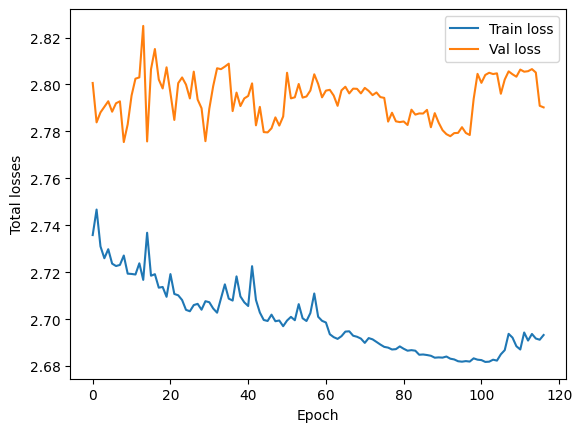

In [65]:
plt.plot(train_list,label="Train loss")
plt.plot(val_list,label="Val loss")

plt.xlabel("Epoch")
plt.ylabel("Total losses")

plt.legend()
plt.show()

In [ ]:
def decode(enc):
    "enc: tensor of numbers"
    mask = enc >0
    enc = torch.masked_select(enc, mask)
    print(enc.shape)
#     enc = le.inverse_transform(enc.tolist())
    
#     enc = ''.join(enc)
#     print(enc)
#     print(enc.tolist())
    return enc
    

In [ ]:
!pip install jiwer

In [ ]:
import jiwer

results = []
model.eval()
t_all = ''
h_all = ''
with torch.inference_mode():
    for batch in test_loader:
        imgs,targets,_ = batch
        imgs = imgs.to(device)
        out = model(imgs,None,None)
#         out = out.argmax(dim=2)
        top_values, top_indices = torch.topk(out, k=2, dim=2)

        # Extract the second highest values using indexing
        second_highest_values = top_values[:, 1]
        second_highest_indices = top_indices[:,:, 1]

        # print(second_highest_values)
#         print(second_highest_indices.shape)
#         hyp = decode(second_highest_indices)
#         tar = decode(targets)
        targets = decode(targets)
        t_all += targets
        h_all += hyp
        break

 





        
        

In [ ]:
transforms = jiwer.Compose(
            [
#                 jiwer.ExpandCommonEnglishContractions(),
                jiwer.RemoveEmptyStrings(),
                jiwer.ToLowerCase(),
                jiwer.RemoveMultipleSpaces(),
                jiwer.Strip(),
                jiwer.RemovePunctuation(),
                jiwer.ReduceToListOfListOfWords(),
                # jiwer.ReduceToListOfListOfChars(),
            ]
        )


cer = jiwer.cer(    # or jiwer.cer()
                        t_all,
                        h_all,
                    )
print(f"W(cer) :",cer)

In [ ]:
t_all

In [ ]:
h_all

In [ ]:
import copy
OLD_MODEL = copy.deepcopy(model)
OLD_MODEL